# **Data Collection using Kaggle's API**

In [ ]:
!pip install kaggle

In [ ]:
# Move it to the correct directory
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json  # Secure permissions


In [ ]:
!kaggle datasets download -d ankitbatra1210/diabetes-dataset

Dataset URL: https://www.kaggle.com/datasets/ankitbatra1210/diabetes-dataset
License(s): CC0-1.0
  0% 0.00/2.35M [00:00<?, ?B/s]
100% 2.35M/2.35M [00:00<00:00, 171MB/s]


In [ ]:
import zipfile

# Extract the dataset
with zipfile.ZipFile("diabetes-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("diabetes_data")

print("Dataset extracted successfully!")


Dataset extracted successfully!


# **Data Overview**

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("diabetes_data/diabetes_data.csv")

# Display first few rows
print(df.head())


                             Target Genetic Markers Autoantibodies  \
0          Steroid-Induced Diabetes        Positive       Negative   
1  Neonatal Diabetes Mellitus (NDM)        Positive       Negative   
2                       Prediabetic        Positive       Positive   
3                   Type 1 Diabetes        Negative       Positive   
4                  Wolfram Syndrome        Negative       Negative   

  Family History Environmental Factors  Insulin Levels  Age   BMI  \
0             No               Present            40.0   44  38.0   
1             No               Present            13.0    1  17.0   
2            Yes               Present            27.0   36  24.0   
3             No               Present             8.0    7  16.0   
4            Yes               Present            17.0   10  17.0   

  Physical Activity Dietary Habits  ...  Pulmonary Function  \
0              High        Healthy  ...                  76   
1              High        Healthy  ..

In [ ]:
print(df.shape)

(70000, 34)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Target                         70000 non-null  object 
 1   Genetic Markers                70000 non-null  object 
 2   Autoantibodies                 70000 non-null  object 
 3   Family History                 70000 non-null  object 
 4   Environmental Factors          70000 non-null  object 
 5   Insulin Levels                 69985 non-null  float64
 6   Age                            70000 non-null  int64  
 7   BMI                            69985 non-null  float64
 8   Physical Activity              70000 non-null  object 
 9   Dietary Habits                 70000 non-null  object 
 10  Blood Pressure                 70000 non-null  int64  
 11  Cholesterol Levels             70000 non-null  int64  
 12  Waist Circumference            70000 non-null 

# **EDA**

## Data Check

### Checking Missing Values

In [ ]:
missing_values = df.isnull().sum()

print("\n Checking for Missing Values:")
print(missing_values[missing_values > 0])



 Checking for Missing Values:
Insulin Levels          15
BMI                     15
Blood Glucose Levels    15
Ethnicity                8
Smoking Status          10
Alcohol Consumption     10
dtype: int64


### Checking for Duplicates

In [ ]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

df = df.drop_duplicates()

Number of duplicate rows: 0


### Checking fo Categorical Column Inconsistencies

In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns

for col in categorical_columns:
    unique_values = df[col].unique()
    print(f"\n🔍 Unique values in '{col}':")
    print(unique_values[:30])  #



🔍 Unique values in 'Target':
['Steroid-Induced Diabetes' 'Neonatal Diabetes Mellitus (NDM)'
 'Prediabetic' 'Type 1 Diabetes' 'Wolfram Syndrome' 'LADA'
 'Type 2 Diabetes' 'Wolcott-Rallison Syndrome' 'Secondary Diabetes'
 'Type 3c Diabetes (Pancreatogenic Diabetes)' 'Gestational Diabetes'
 'Cystic Fibrosis-Related Diabetes (CFRD)' 'MODY']

🔍 Unique values in 'Genetic Markers':
['Positive' 'Negative']

🔍 Unique values in 'Autoantibodies':
['Negative' 'Positive']

🔍 Unique values in 'Family History':
['No' 'Yes']

🔍 Unique values in 'Environmental Factors':
['Present' 'Absent']

🔍 Unique values in 'Physical Activity':
['High' 'Low' 'Moderate']

🔍 Unique values in 'Dietary Habits':
['Healthy' 'Unhealthy']

🔍 Unique values in 'Ethnicity':
['Low Risk' 'High Risk' nan 'asain' 'caucASian' 'caucasion' 'ASIAn']

🔍 Unique values in 'Socioeconomic Factors':
['Medium' 'High' 'Low']

🔍 Unique values in 'Smoking Status':
['Smoker' 'Non-Smoker' nan]

🔍 Unique values in 'Alcohol Consumption':
['High' '

###  Detecting Outliers

In [ ]:
import numpy as np

print("\n🔍 Summary Statistics for Numerical Columns:")
print(df.describe())

numeric_columns = df.select_dtypes(include=[np.number]).columns

print("\n🔍 Checking for Potential Outliers:")
for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}: {len(outliers)} potential outliers detected")



🔍 Summary Statistics for Numerical Columns:
       Insulin Levels           Age           BMI  Blood Pressure  \
count    69985.000000  70000.000000  69985.000000    70000.000000   
mean        21.617904     32.020843     24.782911      111.339543   
std         10.877246     21.043041      6.014299       19.945000   
min          5.000000      0.000000     12.000000       60.000000   
25%         13.000000     14.000000     20.000000       99.000000   
50%         19.000000     31.000000     25.000000      113.000000   
75%         28.000000     49.000000     29.000000      125.000000   
max        270.000000     79.000000     39.000000      149.000000   

       Cholesterol Levels  Waist Circumference  Blood Glucose Levels  \
count        70000.000000         70000.000000          69985.000000   
mean           194.867200            35.051657            160.703322   
std             44.532466             6.803461             48.167249   
min            100.000000            20.00000

## Data Cleaning

### Handling Missing Values

In [ ]:
numeric_columns = df.select_dtypes(include=[np.number]).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())

categorical_columns = df.select_dtypes(include=['object']).columns
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

print("\nMissing values handled successfully!")



Missing values handled successfully!


### Fixing Inconsistent Categorical Values

In [ ]:
df["Ethnicity"] = df["Ethnicity"].replace({
    "asain": "Asian", "aSian": "Asian", "ASIAn": "Asian",
    "caucasion": "Caucasian", "CauCaisan": "Caucasian", "caucASian": "Caucasian"
})

print(" Fixed categorical inconsistencies!")


 Fixed categorical inconsistencies!


### Handling Outliers

In [ ]:
# Clip extreme values in Insulin Levels to 99th percentile
upper_limit = df["Insulin Levels"].quantile(0.99)
df["Insulin Levels"] = np.where(df["Insulin Levels"] > upper_limit, upper_limit, df["Insulin Levels"])

print("\nOutliers handled successfully!")



Outliers handled successfully!


### Correcting Random Noise in Age

In [ ]:
# Clip Age values within reasonable range (e.g., 10 to 100)
df["Age"] = np.clip(df["Age"], 10, 100)

print("\nAge values corrected successfully!")



Age values corrected successfully!


In [ ]:
cleaned_file_path = "/content/diabetes_data/diabetes_cleaned.csv"
df.to_csv(cleaned_file_path, index=False)

print("Cleaned dataset saved successfully!")


Cleaned dataset saved successfully!


## Data Visualziation

###Distribution of Blood Glucose Levels

In [ ]:
import plotly.express as px

fig = px.histogram(df, x="Blood Glucose Levels", nbins=30, title="Distribution of Blood Glucose Levels",
                    color_discrete_sequence=["royalblue"])
fig.update_layout(bargap=0.1)
fig.show()

### BMI vs. Age Scatter Plot


In [ ]:
fig = px.scatter(df, x="Age", y="BMI", color="Blood Glucose Levels", title="BMI vs Age (Colored by Blood Glucose)",
                  color_continuous_scale="reds", opacity=0.7)
fig.show()


### Box Plot of Insulin Levels by Diabetes Status

In [ ]:
fig = px.box(df, x="Target", y="Insulin Levels", color="Target", title="Insulin Levels by Diabetes Status")
fig.show()


### Heatmap of Feature Correlations

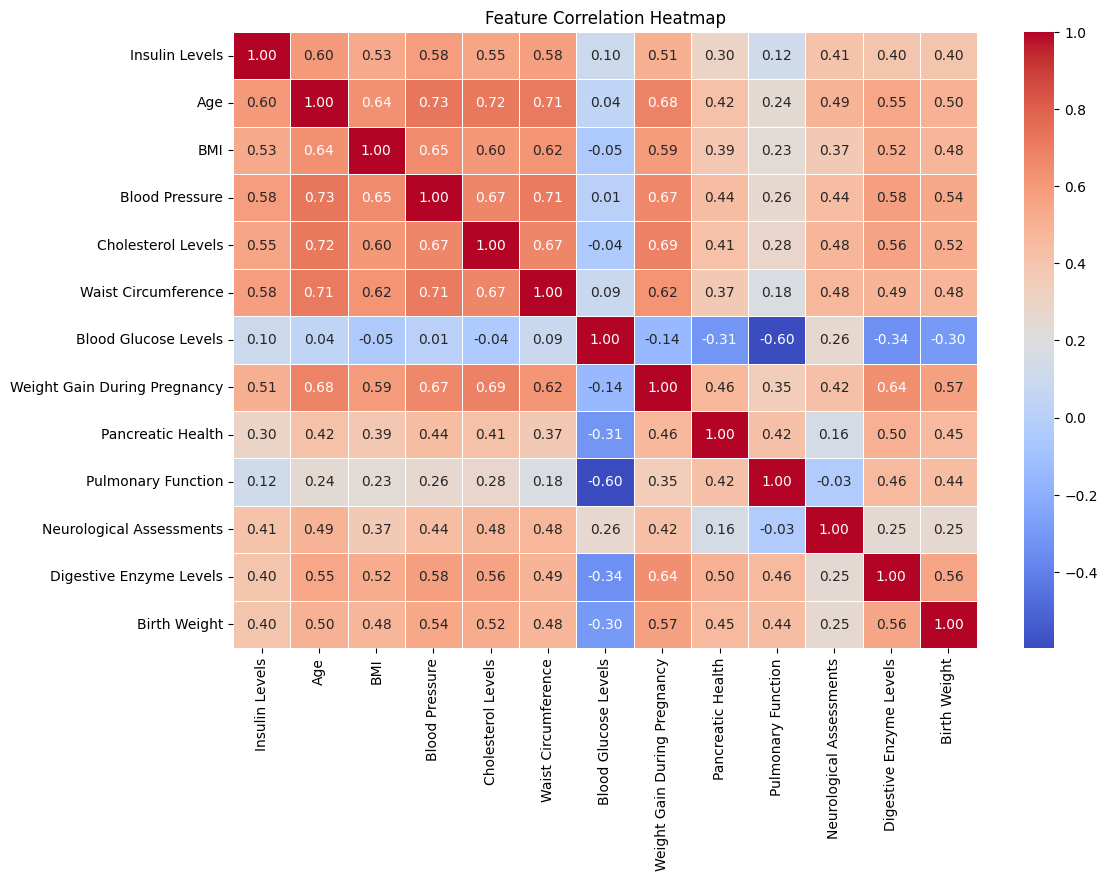

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include=['number']).corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


###  Distribution of Diabetes Cases



In [ ]:
fig = px.pie(df, names="Target", title="Distribution of Diabetes Cases", hole=0.4,
              color_discrete_sequence=px.colors.qualitative.Set2)
fig.show()


###  Age Distribution by Diabetes Outcome


In [ ]:
fig = px.histogram(df, x="Age", color="Target", barmode="overlay",
                    title="Age Distribution by Diabetes Outcome",
                    color_discrete_map={0: "blue", 1: "red"})
fig.show()


### Relationship Between Blood Glucose & Insulin Levels

In [ ]:
fig = px.scatter(df, x="Blood Glucose Levels", y="Insulin Levels", color="Target",
                  title="Blood Glucose vs Insulin Levels", opacity=0.7)
fig.show()


### Average BMI by Diabetes Outcome

In [ ]:
fig = px.bar(df.groupby("Target")["BMI"].mean().reset_index(), x="Target", y="BMI",
              title="Average BMI by Diabetes Outcome", color="Target")
fig.show()


### Box Plot for Blood Pressure by Diabetes Status

In [ ]:
fig = px.box(df, x="Target", y="Blood Pressure", color="Target",
              title="Blood Pressure by Diabetes Status")
fig.show()


### Relationship Between Age and Cholesterol Levels

In [ ]:
fig = px.scatter(df, x="Age", y="Cholesterol Levels", color="Target",
                   title="Age vs Cholesterol Levels", opacity=0.7)
fig.show()
